In [1]:
!pip install --upgrade tables

     |████████████████████████████████| 4.3MB 2.8MB/s 
  Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4


In [2]:
ls

drive/  sample_data/


In [4]:
cd 'drive/My Drive/Colab Notebooks/dw_matrix/matrix_two/dw_matrix_car'

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_two/dw_matrix_car


In [5]:
ls

data/  LICENSE  README.md


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [9]:
df = pd.read_hdf('data/car.h5')
df.head()

,breadcrumb,created_at,price_currency,price_details,price_value,seller_address,seller_name,seller_type,feature_czujniki-parkowania-przednie,feature_poduszka-powietrzna-chroniąca-kolana,feature_kurtyny-powietrzne,feature_klimatyzacja-dwustrefowa,feature_światła-led,feature_czujnik-zmierzchu,feature_elektrycznie-ustawiane-lusterka,feature_asr-(kontrola-trakcji),feature_poduszka-powietrzna-kierowcy,feature_cd,feature_elektryczne-szyby-przednie,feature_poduszka-powietrzna-pasażera,feature_system-start-stop,feature_światła-do-jazdy-dziennej,feature_komputer-pokładowy,feature_elektryczne-szyby-tylne,feature_klimatyzacja-manualna,feature_tapicerka-welurowa,feature_czujnik-deszczu,feature_światła-przeciwmgielne,feature_ogrzewanie-postojowe,feature_radio-niefabryczne,feature_regulowane-zawieszenie,feature_ogranicznik-prędkości,feature_zmieniarka-cd,feature_szyberdach,feature_isofix,feature_asystent-pasa-ruchu,feature_alufelgi,feature_bluetooth,feature_nawigacja-gps,feature_asystent-parkowania,...,param_particle-filter,param_zarejestrowany-w-polsce,param_oferta-od,param_moc,param_make,param_kraj-pochodzenia,param_engine-power,param_year,param_serwisowany-w-aso,param_rodzaj-paliwa,param_możliwość-finansowania,param_registered-in-poland,param_transmission,param_miesięczna-rata,param_kod-silnika,param_version,param_opłata-początkowa,param_model-pojazdu,param_pojemność-skokowa,param_kierownica-po-prawej-(anglik),param_fuel-type,param_vat-free,param_acrylic,param_damaged,param_door-count,param_tuning,param_filtr-cząstek-stałych,param_nr-of-seats,param_kolor,param_engine-capacity,param_pearl,param_stan,param_wersja,param_emisja-co2,param_body-type,param_matowy,param_bezwypadkowy,param_akryl-(niemetalizowany),param_monthly-payment-value,car_id
0,"[Osobowe, Dacia, Logan, Dacia Logan II (2012-)]","13:23, 5 marca 2018",PLN,Cena Brutto,45100.0,"Krasne 7A - 36-007 Krasne, rzeszowski, Podkarp...",AUTO SPEKTRUM,Dealer,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,...,None,None,Firmy,90 KM,None,None,None,None,None,Benzyna+LPG,None,None,None,None,None,None,None,Logan,898 cm3,None,None,None,None,None,None,None,None,None,Inny kolor,None,None,Nowe,II (2012-),None,None,None,Tak,None,None,0
2,"[Osobowe, Peugeot, 3008, Peugeot 3008 I (2009-...","15:48, 5 marca 2018",PLN,"Cena Brutto, Do negocjacji, Faktura VAT",28000.0,"Tomaszów Mazowiecki, tomaszowski, Łódzkie",None,Osoba prywatna,False,False,False,True,False,False,True,True,True,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,...,None,Tak,Osoby prywatnej,115 KM,None,Polska,None,None,None,Diesel,None,None,None,None,None,None,None,3008,1 560 cm3,None,None,None,None,None,None,None,None,None,Czarny,None,None,Używane,I (2009-2016),None,None,None,Tak,None,None,2
3,"[Osobowe, Porsche, Cayenne, Porsche Cayenne II...","06:30, 4 marca 2018",PLN,"Cena Netto, Do negocjacji, Faktura VAT",229500.0,"Kępińska 24a - 63-640 Bralin, kępiński, Wielko...",P.W. GRIB,Dealer,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,False,True,True,True,True,True,False,True,True,True,True,...,None,None,Firmy,262 KM,None,Niemcy,None,None,Tak,Diesel,Tak,None,None,None,None,None,None,Cayenne,3 000 cm3,None,None,None,None,None,None,None,None,None,Czarny,None,None,Używane,II (2010-),None,None,None,None,None,None,3
4,"[Osobowe, Peugeot, 308, Peugeot 308 T7 (2008-2...","08:46, 3 marca 2018",PLN,"Cena Brutto, Do negocjacji",19500.0,"Limanowa, limanowski, Małopolskie",None,Osoba prywatna,False,False,False,False,False,True,True,True,True,True,True,True,False,False,True,True,False,False,True,True,False,False,False,False,False,False,True,False,True,False,False,False,...,None,Tak,Osoby prywatnej,110 KM,None,Polska,None,None,Tak,Diesel,None,None,None,None,None,None,None,308,1

In [50]:
df.columns.values

array(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana',
       'feature_kurtyny-powietrzne', 'feature_klimatyzacja-dwustrefowa',
       'feature_światła-led', 'feature_czujnik-zmierzchu',
       'feature_elektrycznie-ustawiane-lusterka',
       'feature_asr-(kontrola-trakcji)',
       'feature_poduszka-powietrzna-kierowcy', 'feature_cd',
       'feature_elektryczne-szyby-przednie',
       'feature_poduszka-powietrzna-pasażera',
       'feature_system-start-stop', 'feature_światła-do-jazdy-dziennej',
       'feature_komputer-pokładowy', 'feature_elektryczne-szyby-tylne',
       'feature_klimatyzacja-manualna', 'feature_tapicerka-welurowa',
       'feature_czujnik-deszczu', 'feature_światła-przeciwmgielne',
       'feature_ogrzewanie-postojowe', 'feature_radio-niefabryczne',
       'feature_regulowane-zaw

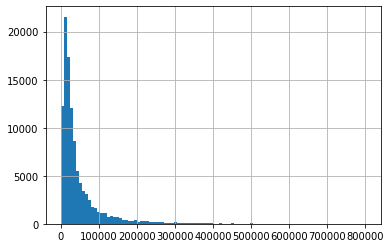

In [12]:
df['price_value'].hist(bins=100)

In [15]:
df['price_value'].max()



799900.0

In [16]:
df['price_value'].describe()

count    106494.000000
mean      47534.137437
std       66308.716918
min         400.000000
25%       13890.000000
50%       25500.000000
75%       52900.000000
max      799900.000000
Name: price_value, dtype: float64

In [21]:
df['param_marka-pojazdu'].nunique(), df['param_marka-pojazdu'].unique()

(100, array(['Dacia', 'Peugeot', 'Porsche', 'Volkswagen', 'Škoda', 'Jeep',
        'Renault', 'Opel', 'Volvo', 'Audi', 'BMW', 'Toyota', 'Kia',
        'Hyundai', 'Citroën', 'Nissan', 'Daewoo', 'Fiat', 'Mercedes-Benz',
        'Mini', 'Ford', 'Chevrolet', 'Infiniti', 'Suzuki', 'Lexus', 'Seat',
        'Mitsubishi', 'SsangYong', 'Mazda', 'Alfa Romeo', 'Saab', 'Dodge',
        'Jaguar', 'Honda', 'Smart', 'Land Rover', 'Chrysler',
        'Aston Martin', 'Subaru', 'Piaggio', 'Daihatsu', 'Cadillac',
        'Lada', 'Iveco', 'Lincoln', 'Inny', 'Lancia', 'Yugo', 'Pontiac',
        'MG', 'Scion', None, 'Hummer', 'Polonez', 'Maybach', 'Maserati',
        'Aixam', 'Bentley', 'Lamborghini', 'Isuzu', 'Gaz', 'Rover',
        'Wartburg', 'Mercury', 'Ferrari', 'Oldsmobile', 'Rolls-Royce',
        'Moskwicz', 'Ligier', 'Vauxhall', 'Tesla', 'Microcar', 'Acura',
        'Buick', 'Tarpan', 'Uaz', 'McLaren', 'GMC', 'Warszawa', 'Morgan',
        'Żuk', 'Tata', 'Brilliance', 'Triumph', 'Chatenet', 'Zastava'

In [20]:
df['param_marka-pojazdu'].nunique()

100

In [0]:
def group_and_barplot(feat_groupby, feat_agg='price_value', agg_funcs=[np.mean, np.median, np.size], feat_sort='mean', top=50):
  return  (
    df
    .groupby(feat_groupby)[feat_agg]
    .agg(agg_funcs) 
    .sort_values(by=feat_sort, ascending=False)
    .head(top)
  ).plot(kind='bar',figsize=(20,10), subplots=True)

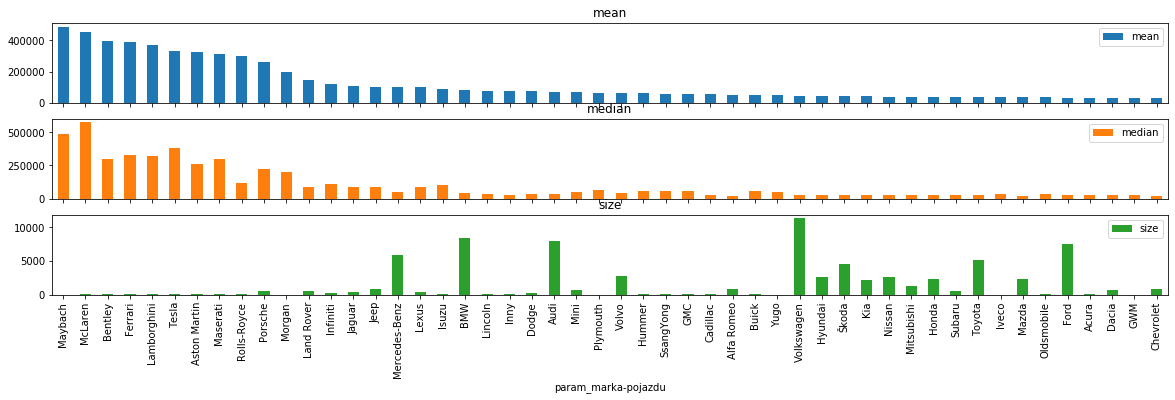

In [46]:
group_and_barplot('param_marka-pojazdu');

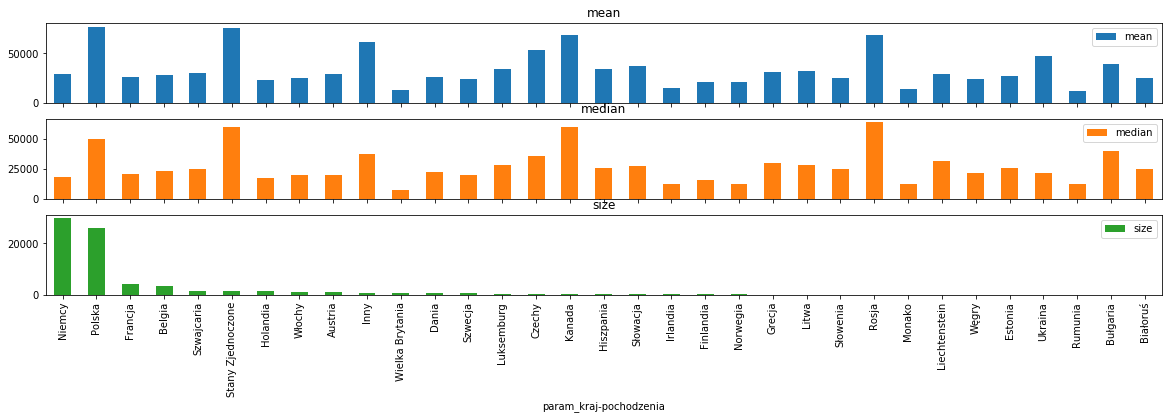

In [55]:
group_and_barplot('param_kraj-pochodzenia',feat_sort = 'size');

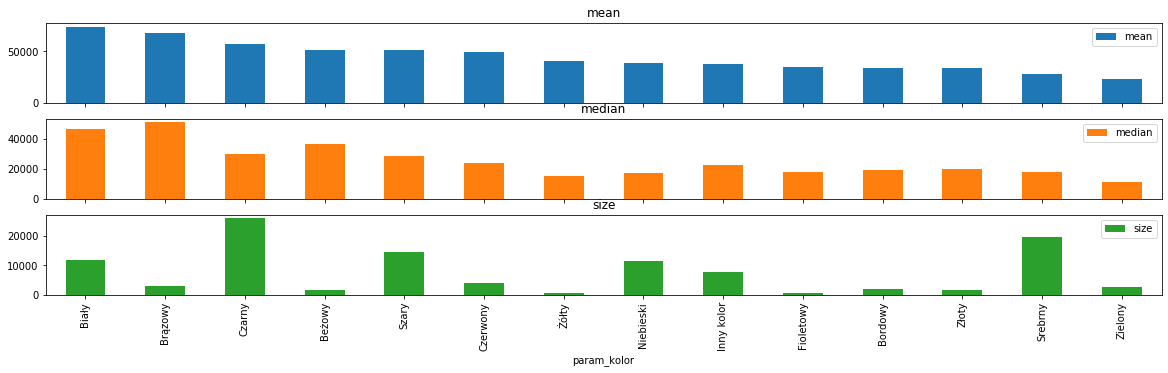

In [60]:
group_and_barplot('param_kolor', feat_sort='mean');

In [100]:
def int_filter(val):
    val_int = re.sub('[^0-9]','', val)
    if val_int != '': return val_int
    else: return -1
    
df['param_przebieg'].sample(40)

52094     149 000 km
22988     110 600 km
146159    205 000 km
55986     132 732 km
49877     167 111 km
11011     260 000 km
136581    163 000 km
94012           5 km
112124    230 000 km
153815          4 km
601       127 000 km
5952      265 300 km
104742     33 475 km
137273    114 500 km
42580     230 000 km
52555           5 km
140131    165 000 km
133820    190 000 km
151521     10 000 km
74310     148 000 km
153142    240 000 km
88021     145 170 km
107013     17 910 km
148846    130 000 km
113796    166 000 km
9605       73 481 km
74945     193 256 km
144359    183 000 km
123009     44 393 km
121863    161 000 km
15980     344 244 km
11623      31 966 km
65876     194 300 km
72704     211 411 km
144504     11 500 km
101313    134 000 km
70856           1 km
154506    158 000 km
143918    106 000 km
39153     201 252 km
Name: param_przebieg, dtype: object

In [101]:
pd.cut(df['param_przebieg'].astype(str).map(lambda x: int_filter(x) ).astype(np.int), 10)


0         (-14601.691, 1460068.1]
2         (-14601.691, 1460068.1]
3         (-14601.691, 1460068.1]
4         (-14601.691, 1460068.1]
5         (-14601.691, 1460068.1]
                   ...           
160609    (-14601.691, 1460068.1]
160610    (-14601.691, 1460068.1]
160611    (-14601.691, 1460068.1]
160614    (-14601.691, 1460068.1]
160615    (-14601.691, 1460068.1]
Name: param_przebieg, Length: 106494, dtype: category
Categories (10, interval[float64]): [(-14601.691, 1460068.1] < (1460068.1, 2920137.2] <
                                     (2920137.2, 4380206.3] < (4380206.3, 5840275.4] < ... <
                                     (8760413.6, 10220482.7] < (10220482.7, 11680551.8] <
                                     (11680551.8, 13140620.9] < (13140620.9, 14600690.0]]

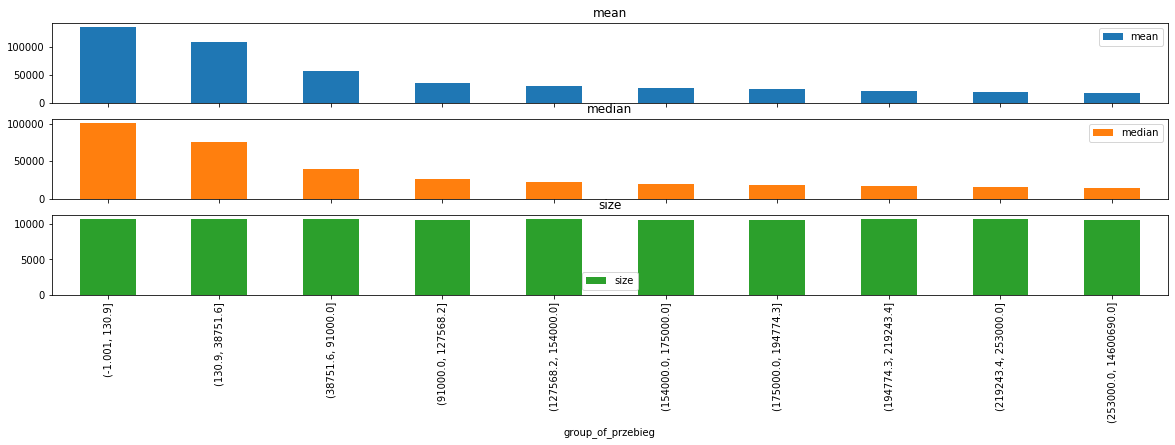

In [103]:
df['group_of_przebieg'] = pd.qcut(df['param_przebieg'].astype(str).map(lambda x: int_filter(x) ).astype(np.int), 10)

group_and_barplot('group_of_przebieg', feat_sort='mean');

In [107]:
df['param_kategoria'].value_counts()

Osobowe    106385
Name: param_kategoria, dtype: int64

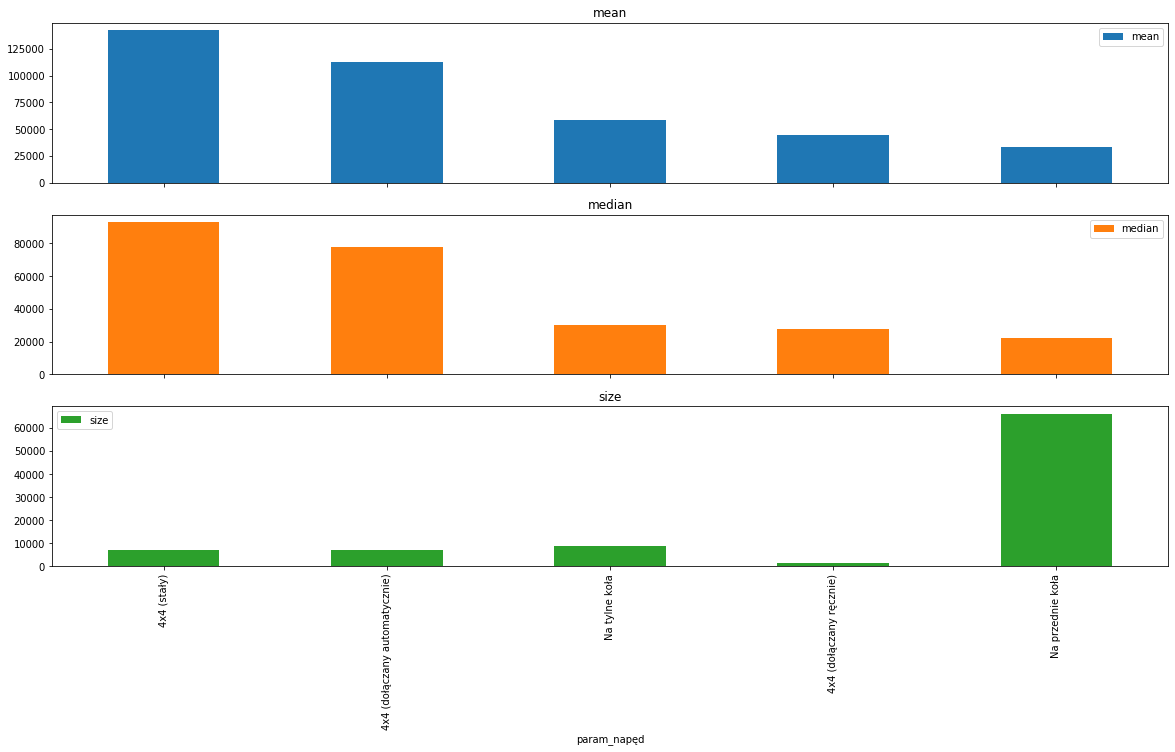

In [111]:
group_and_barplot('param_napęd', feat_sort='mean');


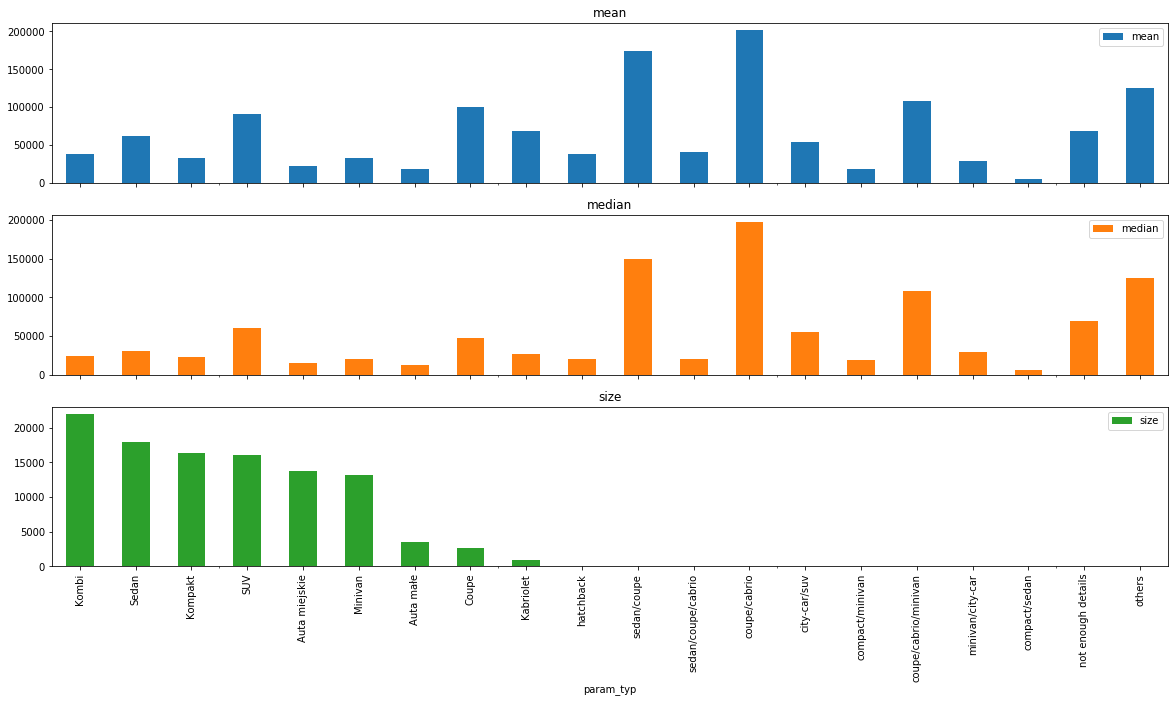

In [113]:
group_and_barplot('param_typ', feat_sort='size');


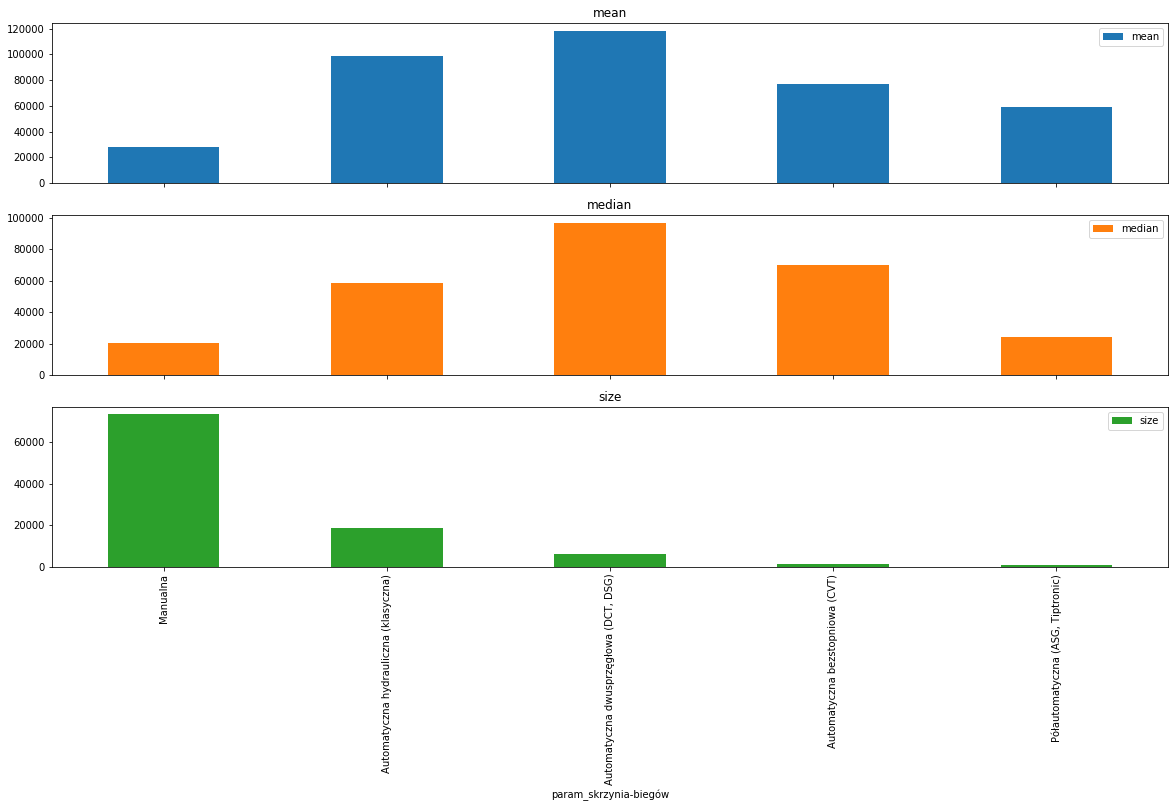

In [115]:
group_and_barplot('param_skrzynia-biegów', feat_sort='size');


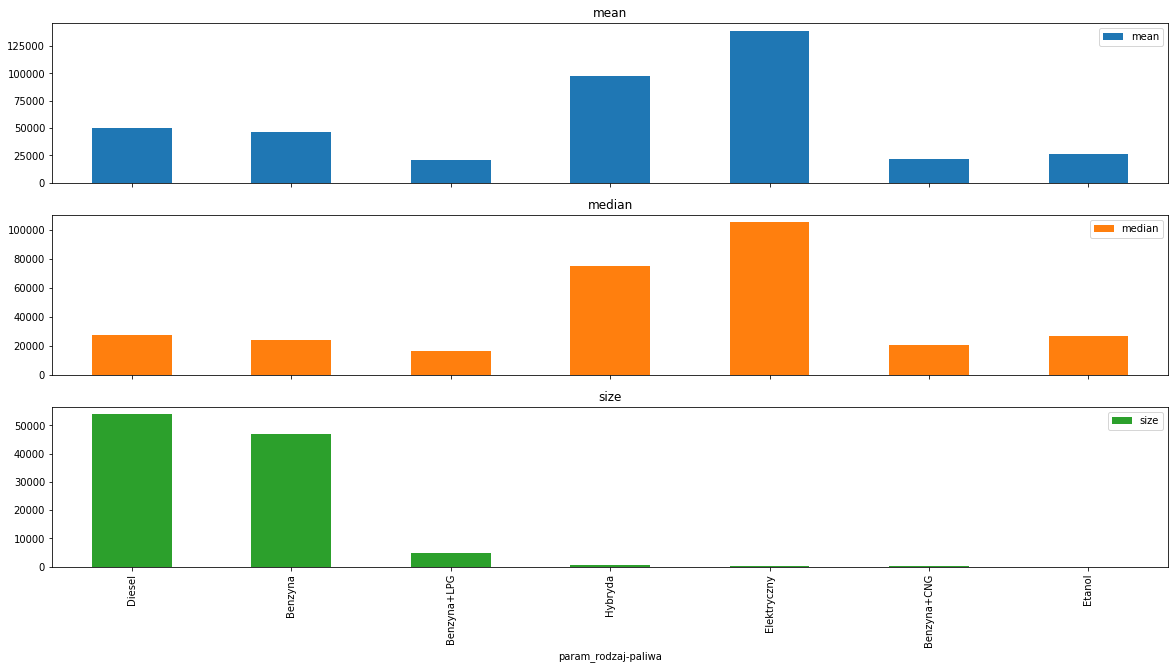

In [116]:
group_and_barplot('param_rodzaj-paliwa', feat_sort='size');



In [0]:
df['param_kierownica-po-prawej-(anglik)'] = df['param_kierownica-po-prawej-(anglik)'].map(lambda x: x if x == 'Tak' else 'Nie')


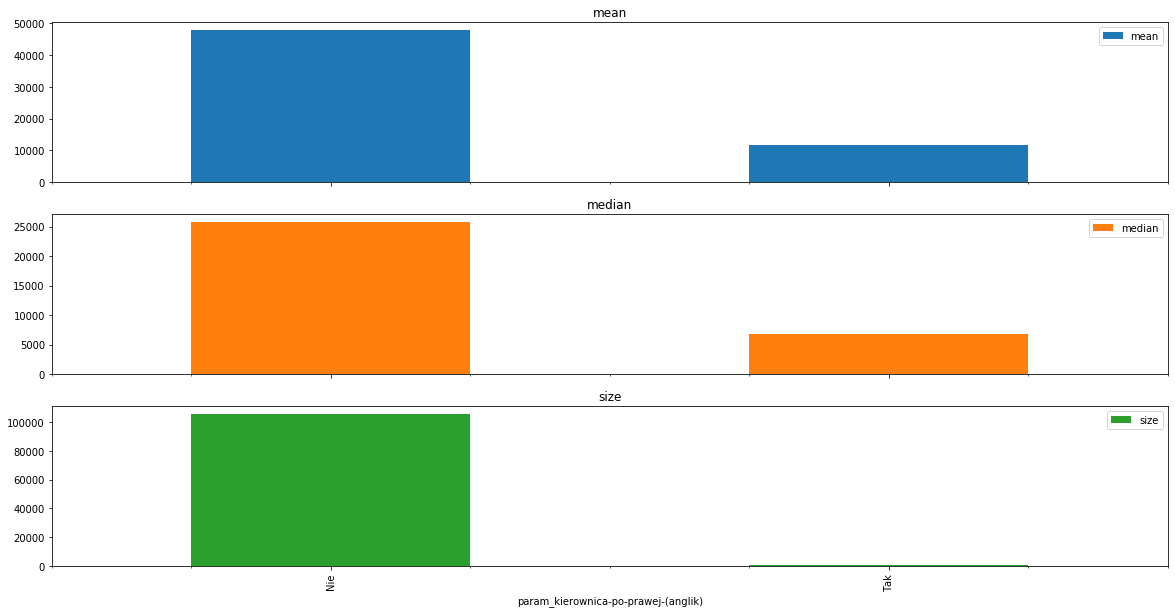

In [124]:
group_and_barplot('param_kierownica-po-prawej-(anglik)', feat_sort='size');


